<a href="https://colab.research.google.com/github/NikitaGalkinV/Data-Analyst-Yandex-Practicum-/blob/main/Mobile_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile application "Unnecessary things" - Selection of user groups based on behavior

## Project description

**Dashboard:** 
https://public.tableau.com/authoring/_16817484648260/sheet3#1

<span style="font-size: 1.5em;">Junk Stuff mobile app where users sell their junk items by posting them on the bulletin board.</span>


**Goal:** Based on user groups, adapt the application to the target and adjacent audience, as well as improve the application in terms of user experience (UX)

**Result:** which is the target (conversion and RR to be determined) - which is adjacent

**Tasks:**
- Select groups of users that differ in metrics
     - retention rate
     - App time
     - Frequency of events
     - Conversion to target action

**Main questions:**
- Users of which group tend to return to the mobile application frequently
- Users of which group do the target event more often

**Target action:** contacts show

**Presentation of the research results:** to top management - a detailed description of the findings and easy-to-read accompanying graphics

## Data Description

The dataset contains data about events that took place in the "Unnecessary things" mobile application. In it, users sell their unwanted items by posting them on the bulletin board.

Dataset **mobile_dataset.csv** contains columns:

- `event.time` - the time of the event
- `event.name` — event name
- `user.id` — user ID

The dataset **mobile_sources.csv** contains the following columns:

- `userId` — user ID
- `source` is the source from which the user installed the application

**Transcription of events:**

- `advert_open` — opening an ad card
- `photos_show` - view photos in the ad
- `tips_show` - the user saw recommended ads
- `tips_click` - the user clicked on the recommended ad
- `contacts_show` and `show_contacts` - the user clicked on the "view phone number" button on the ad card
- `contacts_call` - the user called the phone number on the announcement card
- `map` — the user has opened a map of posted ads
- `search_1` - `search_7` - various events related to site search
- `favorites_add` — add ad to favorites

## Data preprocessing

### Import libraries, dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import math as mth
import warnings
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

from plotly.subplots import make_subplots
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind


In [ ]:
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

display(mobile_sourсes)
display(mobile_dataset)

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


### Check for gaps, duplicates and data types

In [ ]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [ ]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
mobile_dataset.columns =['event_time', 'event_name', 'user_id']
mobile_sourсes.columns = ['user_id', 'source']

In [ ]:
print('Duplicates in data mobile_sourсes:',mobile_sourсes.duplicated().sum())
print('Duplicates in data mobile_dataset:',mobile_dataset.duplicated().sum())


Duplicates in data mobile_sourсes: 0
Duplicates in data mobile_dataset: 0


In [ ]:
print(mobile_dataset['event_name'].unique())

['advert_open' 'tips_show' 'map' 'contacts_show' 'search_4' 'search_5'
 'tips_click' 'photos_show' 'search_1' 'search_2' 'search_3'
 'favorites_add' 'contacts_call' 'search_6' 'search_7' 'show_contacts']


In [ ]:
df_new = mobile_dataset.merge(mobile_sourсes, on='user_id', how='left')
df_new

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902,google
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google


In [ ]:
df_new['event_time'] = pd.to_datetime(df_new['event_time'], format='%Y-%m-%d %H:%M:%S.%f')


### Selection of groups (grouping) - events

In [ ]:
df_new['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open      6164 
contacts_show    4450 
map              3881 
search_1         3506 
favorites_add    1417 
search_5         1049 
tips_click       814  
search_4         701  
contacts_call    541  
search_3         522  
search_6         460  
search_2         324  
search_7         222  
show_contacts    79   
Name: event_name, dtype: int64

In [ ]:
# concatenate events with "search"
df_new.loc[df_new['event_name'].str.contains('search'), 'event_name'] = 'search'

# concatenate events with "contacts_show" and "show_contacts"
df_new.loc[df_new['event_name'].isin(['contacts_show', 'show_contacts']), 'event_name'] = 'show_contacts'

df_new['event_name'].value_counts()


tips_show        40055
photos_show      10012
search           6784 
advert_open      6164 
show_contacts    4529 
map              3881 
favorites_add    1417 
tips_click       814  
contacts_call    541  
Name: event_name, dtype: int64

In [ ]:
df_new


,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74194,2019-11-03 23:56:57.041825,search,20850c8f-4135-4059-b13b-198d3ac59902,google
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google


**Summary:**

There are recurring events and single events that are written in different ways. For further correct calculations, it is necessary to combine them.
Merged similar serach conjunctions into one group and replaced contacts_show', 'show_contacts with one common name

## EDA

### Retantion rate

In [ ]:
start_date = df_new["event_time"].min()
end_date = df_new["event_time"].max()

days_diff = (end_date - start_date).days
print("Start date:", start_date)
print("End date:", end_date)
print("Days count:", days_diff)

Start date: 2019-10-07 00:00:00.431357
End date: 2019-11-03 23:58:12.532487
Days count: 27


In [ ]:
t_start = df_new.groupby('user_id')['event_time'].min()
t_start.name = 'first_start_date'

df_new = df_new.join(t_start, on='user_id')

In [ ]:
df_new['start_event_week'] = df_new['first_start_date'].dt.isocalendar().week
df_new['event_week'] = df_new['event_time'].dt.isocalendar().week
df_new['cohort_lifetime'] = df_new['event_week'] - df_new['start_event_week']


In [ ]:
# Group the data to get the number of users of each segment in the first and subsequent weeks
cohorts = df_new.groupby(['start_event_week','cohort_lifetime']).agg({'user_id': 'nunique'}).reset_index()
cohorts = cohorts.rename(columns={'user_id': 'user_cnt'})

In [ ]:
t = cohorts[cohorts['cohort_lifetime']==0][['start_event_week', 'user_cnt']]
cohorts = cohorts.merge(t, how='left', on='start_event_week', suffixes=('','_start'))
cohorts['retention'] = cohorts['user_cnt'] / cohorts['user_cnt_start']

In [ ]:
retention_pivot = cohorts.pivot_table(
    index='start_event_week',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)

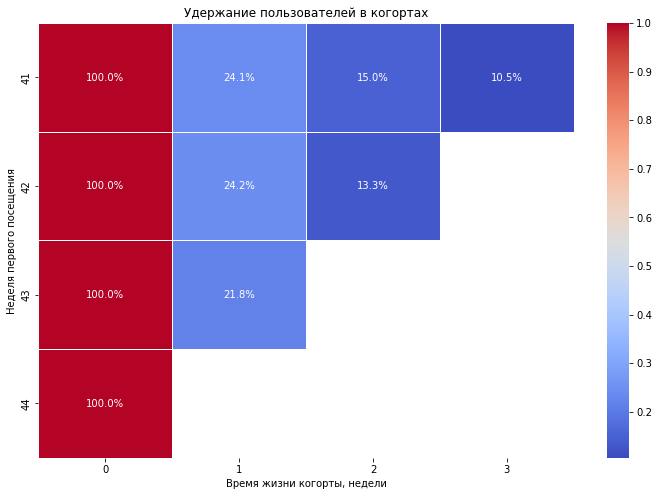

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Удержание пользователей в когортах')
sns.heatmap(
    retention_pivot,
    annot=True,
    fmt='.1%',
    linewidths=0.5,
    linecolor='white',
    cmap='coolwarm'
)
plt.xlabel('Время жизни когорты, недели')
plt.ylabel('Неделя первого посещения')
plt.show()

**Summary:**

The graph is built by weeks, as you can see the whole picture more holistically
- I do not observe a strong drop in retention, it is worth continuing to observe

 

### Time spent in the app

#### Total time of users in the application

In [ ]:
df_new = df_new.sort_values(['user_id', 'event_time'])


In [ ]:
session_id = 0
last_user = ''
last_time = pd.to_datetime('1970-01-01 00:00:00.000000')

for index, row in df_new.iterrows():
    user_id = row['user_id']
    event_time = row['event_time']
    
    if user_id != last_user or (event_time - last_time).total_seconds() > 1800:
        session_id += 1
    
    df_new.at[index, 'session_id'] = session_id
    last_user = user_id
    last_time = event_time

In [ ]:
# Calculate the duration of each session
session_durations = df_new.groupby(['user_id', 'session_id'])['event_time']\
                    .agg(lambda x: (x.max() - x.min()).seconds / 60)

print(session_durations.describe())

count    10368.000000
mean     12.871277   
std      19.859054   
min      0.000000    
25%      0.350000    
50%      5.583333    
75%      17.420833   
max      321.966667  
Name: event_time, dtype: float64


In [ ]:
q1 = session_durations.quantile(0.25)

# Remove short sessions
session_durations_filtered = session_durations[session_durations >= q1]


In [ ]:
mean_duration = session_durations.mean()
print('Average time spent by users in the app: {:.2f} minutes'.format(mean_duration))

Average time spent by users in the app: 12.87 minutes


### Visit frequency

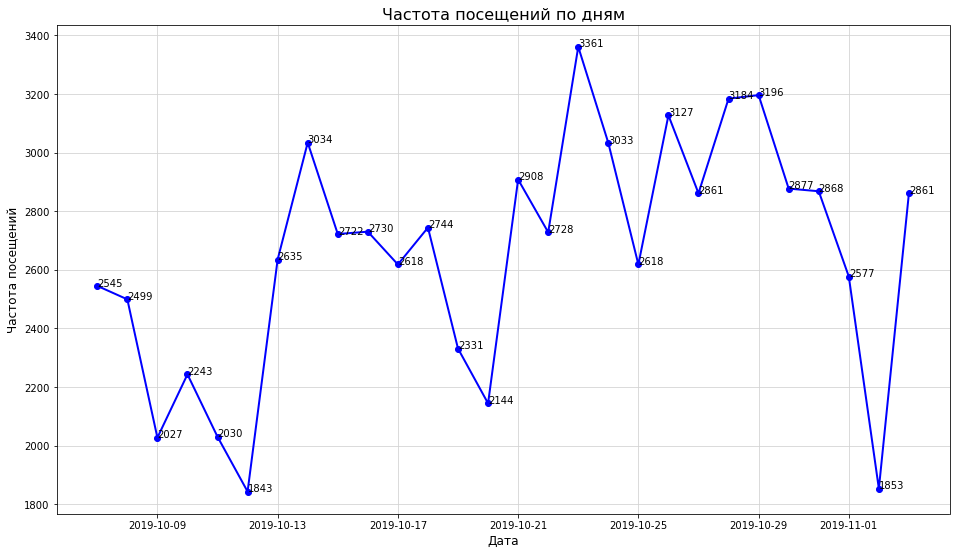

In [ ]:
df_new['date'] = df_new['event_time'].dt.date

# group data by date and user_id and count the number of events
app_usage_by_day = df_new.groupby(['date', 'user_id'])['event_name'].count()

# group the data by date and calculate the total number of events per day
app_usage_by_day = app_usage_by_day.groupby(level=0).sum()

fig, ax = plt.subplots(figsize=(16, 9))

app_usage_by_day.plot(ax=ax, marker='o', color='blue', linewidth=2)

for i, label in enumerate(app_usage_by_day.values):
    ax.annotate(label, (app_usage_by_day.index[i], label))

ax.grid(True, color='lightgrey')

ax.set_title('Частота посещений по дням', fontsize=16)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Частота посещений', fontsize=12)
ax.tick_params(labelsize=10)

plt.show()


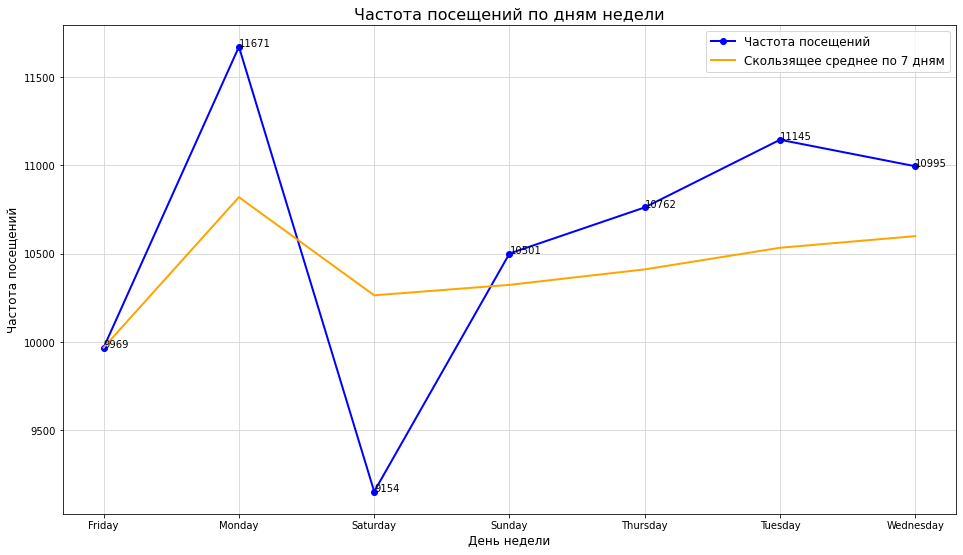

In [ ]:
df_new['weekday'] = df_new['event_time'].dt.day_name()

# group the data by day of the week and user_id and count the number of events
app_usage_by_weekday = df_new.groupby(['weekday', 'user_id'])['event_name'].count()

# group the data by day of the week and calculate the total number of events per day
app_usage_by_weekday = app_usage_by_weekday.groupby(level=0).sum()

# add a 7-day moving average
app_usage_by_weekday_rolling = app_usage_by_weekday.rolling(window=7, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(16, 9))

app_usage_by_weekday.plot(ax=ax, marker='o', color='blue', linewidth=2, label='Частота посещений')
app_usage_by_weekday_rolling.plot(ax=ax, color='orange', linewidth=2, label='Скользящее среднее по 7 дням')

for i, label in enumerate(app_usage_by_weekday.values):
    ax.annotate(label, (i, label))

ax.grid(True, color='lightgrey')

ax.set_title('Частота посещений по дням недели', fontsize=16)
ax.set_xlabel('День недели', fontsize=12)
ax.set_ylabel('Частота посещений', fontsize=12)
ax.tick_params(labelsize=10)
ax.set_xticks(range(len(app_usage_by_weekday.index)))
ax.set_xticklabels(app_usage_by_weekday.index)

plt.legend(fontsize=12)

plt.show()

### Conversion to target action (show_contacts)

In [ ]:
# Count the number of unique users who completed the show_contacts target action
show_contacts_users = df_new[df_new['event_name'] == 'show_contacts']['user_id'].nunique()

# Divide by the total number of unique users in the dataframe
total_users = df_new['user_id'].nunique()

conversion_rate = show_contacts_users / total_users

print(f"Conversion rate: {conversion_rate:.1%}")


Conversion rate: 22.9%


**Summary:**

- The overall RR shows a slight decline, you can look at the sources in more detail and understand where we are losing
- Users show higher activity on weekdays
- 1/5 users view contacts

## User segmentation based on actions

- We segment users by source, this will help to better understand where users come from and which acquisition channels are most effective, and can also help optimize marketing efforts and increase marketing ROI. Investing in marketing is the easiest solution at this stage.
- Then you can study what actions are performed in the application with separation by sources and suggest improvements to certain functions
- There is an assumption that a slight drop in RR is associated with certain sources, and not with a general drop in all sources
- Most likely the conversion may also be different and some source with a low conversion will have an impact on the overall conversion

### Retention rate of users by source

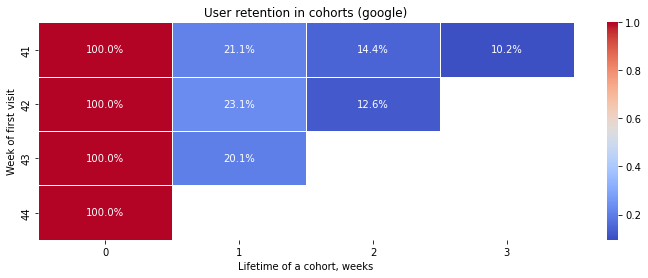

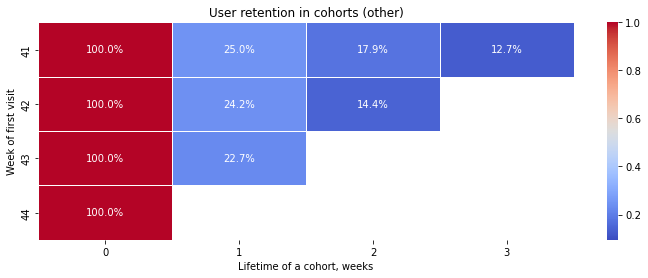

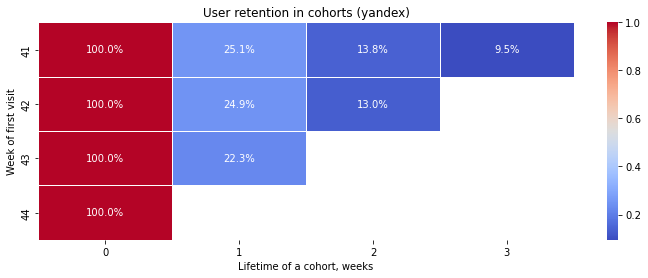

In [ ]:
# Group the data to get the number of users of each segment in the first and subsequent weeks
cohorts = df_new.groupby(['start_event_week', 'cohort_lifetime', 'source']).agg({'user_id': 'nunique'}).reset_index()
cohorts = cohorts.rename(columns={'user_id': 'user_cnt'})

t = cohorts[cohorts['cohort_lifetime'] == 0][['start_event_week', 'source', 'user_cnt']]
cohorts = cohorts.merge(t, how='left', on=['start_event_week', 'source'], suffixes=('', '_start'))
cohorts['retention'] = cohorts['user_cnt'] / cohorts['user_cnt_start']

retention_pivot = cohorts.pivot_table(
    index='start_event_week',
    columns=['source', 'cohort_lifetime'],
    values='retention',
    aggfunc='sum'
)

# Customize the display of the heat map
sources = cohorts['source'].unique()
for source in sources:
    retention_pivot_source = retention_pivot[source]
    vmin = np.nanmin(retention_pivot.iloc[:, 1:].values)
    
    plt.figure(figsize=(12, 4))
    plt.title(f'User retention in cohorts ({source})')
    sns.heatmap(
        retention_pivot_source,
        annot=True,
        fmt='.1%',
        linewidths=0.5,
        linecolor='white',
        cmap='coolwarm',
        vmin=vmin,
        vmax=1.0
    )
    plt.xlabel('Lifetime of a cohort, weeks')
    plt.ylabel('Week of first visit')
    plt.show()



### Конверсия группы

In [ ]:
# group data by source column and count the number of events for each group
grouped = df_new.groupby('source')['event_name'].value_counts().unstack().fillna(0)

grouped['conversion'] = grouped['show_contacts'] / grouped['search']

grouped

event_name,advert_open,contacts_call,favorites_add,map,photos_show,search,show_contacts,tips_click,tips_show,conversion
source,,,,,,,,,,
google,1621,163,415,1028,3466,2144,1440,190,9978,0.671642
other,1918,152,259,910,2862,1958,1054,228,10125,0.538304
yandex,2625,226,743,1943,3684,2682,2035,396,19952,0.758762


In [ ]:
show_contacts_df = df_new[df_new['event_name'] == 'show_contacts']

grouped = show_contacts_df.groupby('source')['user_id'].nunique()

conversion_rates = round(grouped / df_new.groupby('source')['user_id'].nunique() * 100,1).sort_values(ascending=False)

conversion_rates


source
yandex    24.7
google    24.4
other     18.5
Name: user_id, dtype: float64

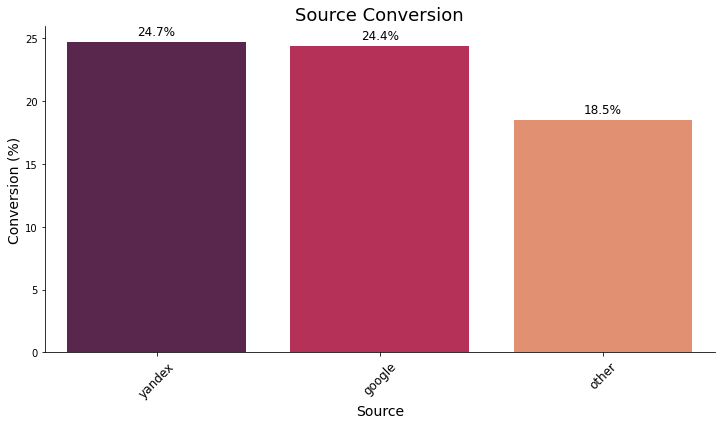

In [ ]:

plt.figure(figsize=(12, 6)) 

ax = sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette="rocket") 

for index, value in enumerate(conversion_rates.values):
    ax.text(index, value + 0.5, str(value)+'%', ha='center', fontsize=12)

plt.title('Source Conversion', fontsize=18)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Conversion (%)', fontsize=14)

plt.xticks(rotation=45, fontsize=12) 

sns.despine() 
plt.show()

- Yandex & Google have the same indicators both in RR and in conversion - these groups are targeted
- Other sources show a higher retention rate, but the conversion to the target action is much lower, it is worth studying in more detail each other source - this group is adjacent

## Testing statistical hypotheses

### Users who came from yandex and google show different conversion to contact views

- H0: The conversion of users who came from Google is equal to the conversion of users who came from Yandex

- H1: The conversion of users who came from Google is not equal to the conversion of users who came from Yandex

In [ ]:
# Filter data by source and save only the necessary sources
df_filtered = df_new[df_new['source'].isin(['google', 'yandex'])]

# Group data by source and count the number of unique users
users_by_source = df_filtered.groupby('source')['user_id'].nunique()

print(users_by_source)

source
google    1129
yandex    1934
Name: user_id, dtype: int64


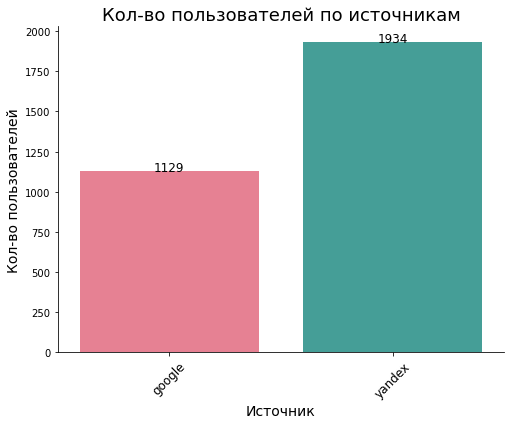

In [ ]:

plt.figure(figsize=(8, 6)) 

ax = sns.barplot(x=users_by_source.index, y=users_by_source.values, palette="husl") # создаем график

for index, value in enumerate(users_by_source.values):
    ax.text(index, value + 0.5, str(value), ha='center', fontsize=12)

plt.title('Кол-во пользователей по источникам', fontsize=18)
plt.xlabel('Источник', fontsize=14)
plt.ylabel('Кол-во пользователей', fontsize=14)

plt.xticks(rotation=45, fontsize=12) 

sns.despine() 
plt.show()

In [ ]:
# calculation of conversion and number of users for each group
source = df_new.groupby('source').user_id.nunique().reset_index()

yandex_all = source.loc[source['source']=='yandex', 'user_id'].iloc[0]
google_all = source.loc[source['source']=='google', 'user_id'].iloc[0]

contacts_show = df_new[df_new.event_name=='show_contacts'].groupby('source').user_id.nunique().reset_index()

contacts_google = contacts_show.loc[contacts_show['source']=='google', 'user_id'].iloc[0]
contacts_yandex = contacts_show.loc[contacts_show['source']=='yandex', 'user_id'].iloc[0]

# проведение z-теста
alpha = 0.05

successes = np.array([contacts_google, contacts_yandex])
trials = np.array([google_all, yandex_all])

p1 = successes[0] / trials[0]
p2 = successes[1] / trials[1]

p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
difference = p1 - p2
z_value = difference / np.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

p_value = st.norm.sf(abs(z_value)) * 2

print("p-value:", p_value)

if p_value < alpha:
    print("We reject the null hypothesis: there is a significant difference between the conversion of google and yandex users")
else:
    print("We failed to reject the null hypothesis: there is no significant difference between the conversion of google and yandex users")
    
    


p-value: 0.8244316027993777
We failed to reject the null hypothesis: there is no significant difference between the conversion of google and yandex users


### Users who use recommendations and those who do not use recommendations show different conversion to the target action (contact view)

- H0: The conversion of users who use recommendations is equal to the conversion of users who do not use recommendations

- H1: The conversion of users who use recommendations is not equal to the conversion of users who do not use recommendations

In [ ]:
# Calculate conversion and number of users for each group
tips_show_users = df_new[df_new['event_name'] == 'tips_show']['user_id'].nunique()
no_tips_show_users = total_users - tips_show_users

tips_show_show_contacts_users = df_new[df_new['event_name'] == 'show_contacts'][df_new['user_id'].isin(df_new[df_new['event_name'] == 'tips_show']['user_id'])]['user_id'].nunique()

no_tips_show_show_contacts_users = show_contacts_users - tips_show_show_contacts_users

# Performing a z-test
alpha = 0.05

successes = np.array([tips_show_show_contacts_users, no_tips_show_show_contacts_users])
trials = np.array([tips_show_users, no_tips_show_users])

p1 = successes[0] / trials[0]
p2 = successes[1] / trials[1]



print(successes[0], successes[1], trials[0], trials[1])

p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
difference = p1 - p2
z_value = difference / np.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

p_value = st.norm.sf(abs(z_value)) * 2


print("p-value:", p_value)

if p_value < alpha:
    print("We reject the null hypothesis: there is a significant difference between the conversion of users who watch tips_show and those who do not")
else:
    print("We failed to reject the null hypothesis: there is no significant difference between the conversion of users who watch tips_show and those who do not")
    
    

516 465 2801 1492
p-value: 2.7953508723109576e-21
We reject the null hypothesis: there is a significant difference between the conversion of users who watch tips_show and those who do not


## Summary

**Summary:**
 
- The dataset presents data for 27 days, the results do not show a strong drop in RR
- The average time in the application is 14 minutes, but it is observed
- The frequency of visits falls on Saturday, and on Monday, on the contrary, increases and stays high throughout the "working week"
- Total conversion to target action 23%
- Yandex and Google have almost the same indicators, while other sources have an advantage
- Yandex and Google have the same conversion pattern again, while other sources have significantly lower conversion
- There is no difference between the conversion of users from google and yandex
- Users who watch tips_show have a higher conversion rate
    
**Offers:**

- Continue to observe a slight decrease in RR
- It is possible to send notifications on Saturday about new recommendations
- Study in more detail the sources of "other" and find the most effective
- Study the reasons for low conversions from other sources and also increase or decrease marketing costs
- View the logic of tips_show for users, improve the principle of recommendations to users based on what recommendations they are watching